In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Datset EDA

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute -- Values: [0 = no heart disease, 1 = mild heart disease, 2 = moderate heart disease, 3 = severe heart disease, 4 = critical heart disease]

cp - chest pain type

trestbps - resting blood pressure

chol - cholesterol measure

fbs - fasting blood sugar

restecg - ecg observation at resting condition

thalch - maximum heart rate achieved

exang - exercise induced angina

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - thal

num - target [0=no heart disease; 1,2,3,4 = stages of heart disease ]

In [3]:
df = pd.read_csv('heart_disease_uci.csv')
df.sample(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
601,602,38,Female,Switzerland,asymptomatic,105.0,0.0,NaN,normal,166.0,False,2.8,upsloping,NaN,NaN,2
258,259,70,Male,Cleveland,atypical angina,156.0,245.0,False,lv hypertrophy,143.0,False,0.0,upsloping,0.0,normal,0
824,825,64,Male,VA Long Beach,asymptomatic,130.0,223.0,False,st-t abnormality,128.0,False,0.5,flat,NaN,NaN,0
226,227,47,Male,Cleveland,asymptomatic,112.0,204.0,False,normal,143.0,False,0.1,upsloping,0.0,normal,0
723,724,55,Male,VA Long Beach,asymptomatic,142.0,228.0,False,st-t abnormality,149.0,True,2.5,upsloping,NaN,NaN,1


In [4]:
df.rename( 
    columns = {
        'cp': 'chest_pain',
        'trestbps': 'resting_bp',
        'chol': 'cholestrol',
        'fbs': 'fasting_blood_sugar',
        'restecg': 'resting_ecg',
        'thalch': 'max_bpm',
        'exang': 'exercise_angina',
        'oldpeak': 'st_exercise'
    },
    inplace=True
)

In [5]:
#Dropping ID
df.drop(labels=['id'], axis=1, inplace=True)

In [6]:
df.sample(5)

,age,sex,dataset,chest_pain,resting_bp,cholestrol,fasting_blood_sugar,resting_ecg,max_bpm,exercise_angina,st_exercise,slope,ca,thal,num
95,52,Male,Cleveland,asymptomatic,128.0,255.0,False,normal,161.0,True,0.0,upsloping,1.0,reversable defect,1
494,35,Male,Hungary,atypical angina,110.0,257.0,False,normal,140.0,False,0.0,NaN,NaN,NaN,1
220,41,Female,Cleveland,non-anginal,112.0,268.0,False,lv hypertrophy,172.0,True,0.0,upsloping,0.0,normal,0
162,54,Female,Cleveland,non-anginal,110.0,214.0,False,normal,158.0,False,1.6,flat,0.0,normal,0
653,56,Male,Switzerland,non-anginal,125.0,0.0,NaN,normal,98.0,False,-2.0,flat,NaN,reversable defect,2


In [7]:
rows, cols = df.shape
print(f'Shape: {rows} Rows, {cols} Columns')

Shape: 920 Rows, 15 Columns


In [8]:
null_count = df.isnull().sum().sort_values(ascending=False)
null_count

ca                     611
thal                   486
slope                  309
fasting_blood_sugar     90
st_exercise             62
resting_bp              59
max_bpm                 55
exercise_angina         55
cholestrol              30
resting_ecg              2
age                      0
sex                      0
dataset                  0
chest_pain               0
num                      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  920 non-null    int64  
 1   sex                  920 non-null    object 
 2   dataset              920 non-null    object 
 3   chest_pain           920 non-null    object 
 4   resting_bp           861 non-null    float64
 5   cholestrol           890 non-null    float64
 6   fasting_blood_sugar  830 non-null    object 
 7   resting_ecg          918 non-null    object 
 8   max_bpm              865 non-null    float64
 9   exercise_angina      865 non-null    object 
 10  st_exercise          858 non-null    float64
 11  slope                611 non-null    object 
 12  ca                   309 non-null    float64
 13  thal                 434 non-null    object 
 14  num                  920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memor

In [10]:
df.describe()

,age,resting_bp,cholestrol,max_bpm,st_exercise,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


[]

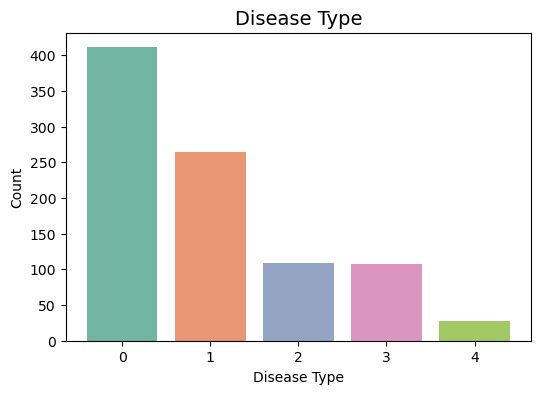

In [11]:
plt.figure(figsize=(6, 4))
plt.title(label='Disease Type', fontdict={"fontsize":14})
sns.countplot(x='num', data=df, palette='Set2')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.plot()

[]

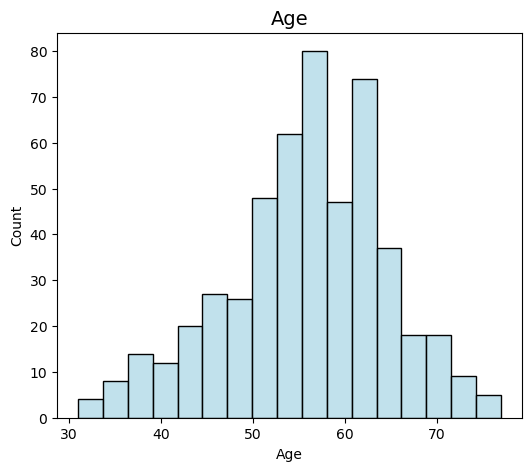

In [12]:
plt.figure(figsize=(6, 5))
plt.title(label='Age', fontdict={"fontsize":14})
plt.xlabel('Age')
plt.ylabel('Count')
sns.histplot(x='age', data=df[df['num'] > 0], color='lightblue')
plt.plot()

[]

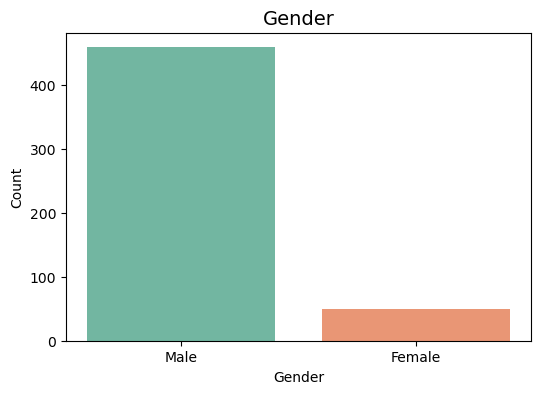

In [13]:
plt.figure(figsize=(6, 4))
plt.title(label='Gender', fontdict={"fontsize":14})
sns.countplot(x='sex', data=df[df['num'] > 0], palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.plot()

[]

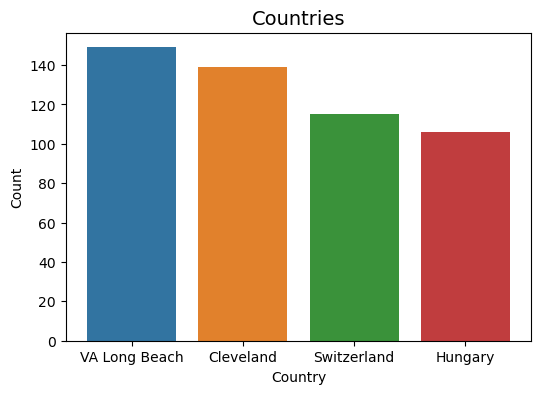

In [14]:
plt.figure(figsize=(6, 4))
plt.title(label='Countries', fontdict={"fontsize":14})
sns.countplot(x='dataset', data=df[df['num'] > 0], order=df[df['num'] > 0]['dataset'].value_counts().index)
plt.xlabel('Country')
plt.ylabel('Count')
plt.plot()

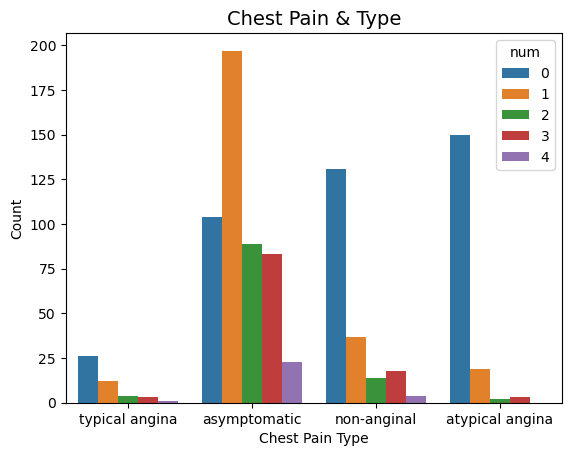

In [15]:
cp_num_group = df.groupby(by=['chest_pain', 'num']).size().reset_index(name = 'count').sort_values(by='count', ascending=False)


plt.title(label='Chest Pain & Type', fontdict={"fontsize":14})
hue_order = df.groupby('num')['num'].count().sort_values().index
sns.countplot(x='chest_pain', hue='num', data=df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Show the plot
plt.show()

# Data Preprocessing

## Analyzing Null values. 
### Creating Countplots for Categorical variables 
### Creating Boxplots for Numeric variables

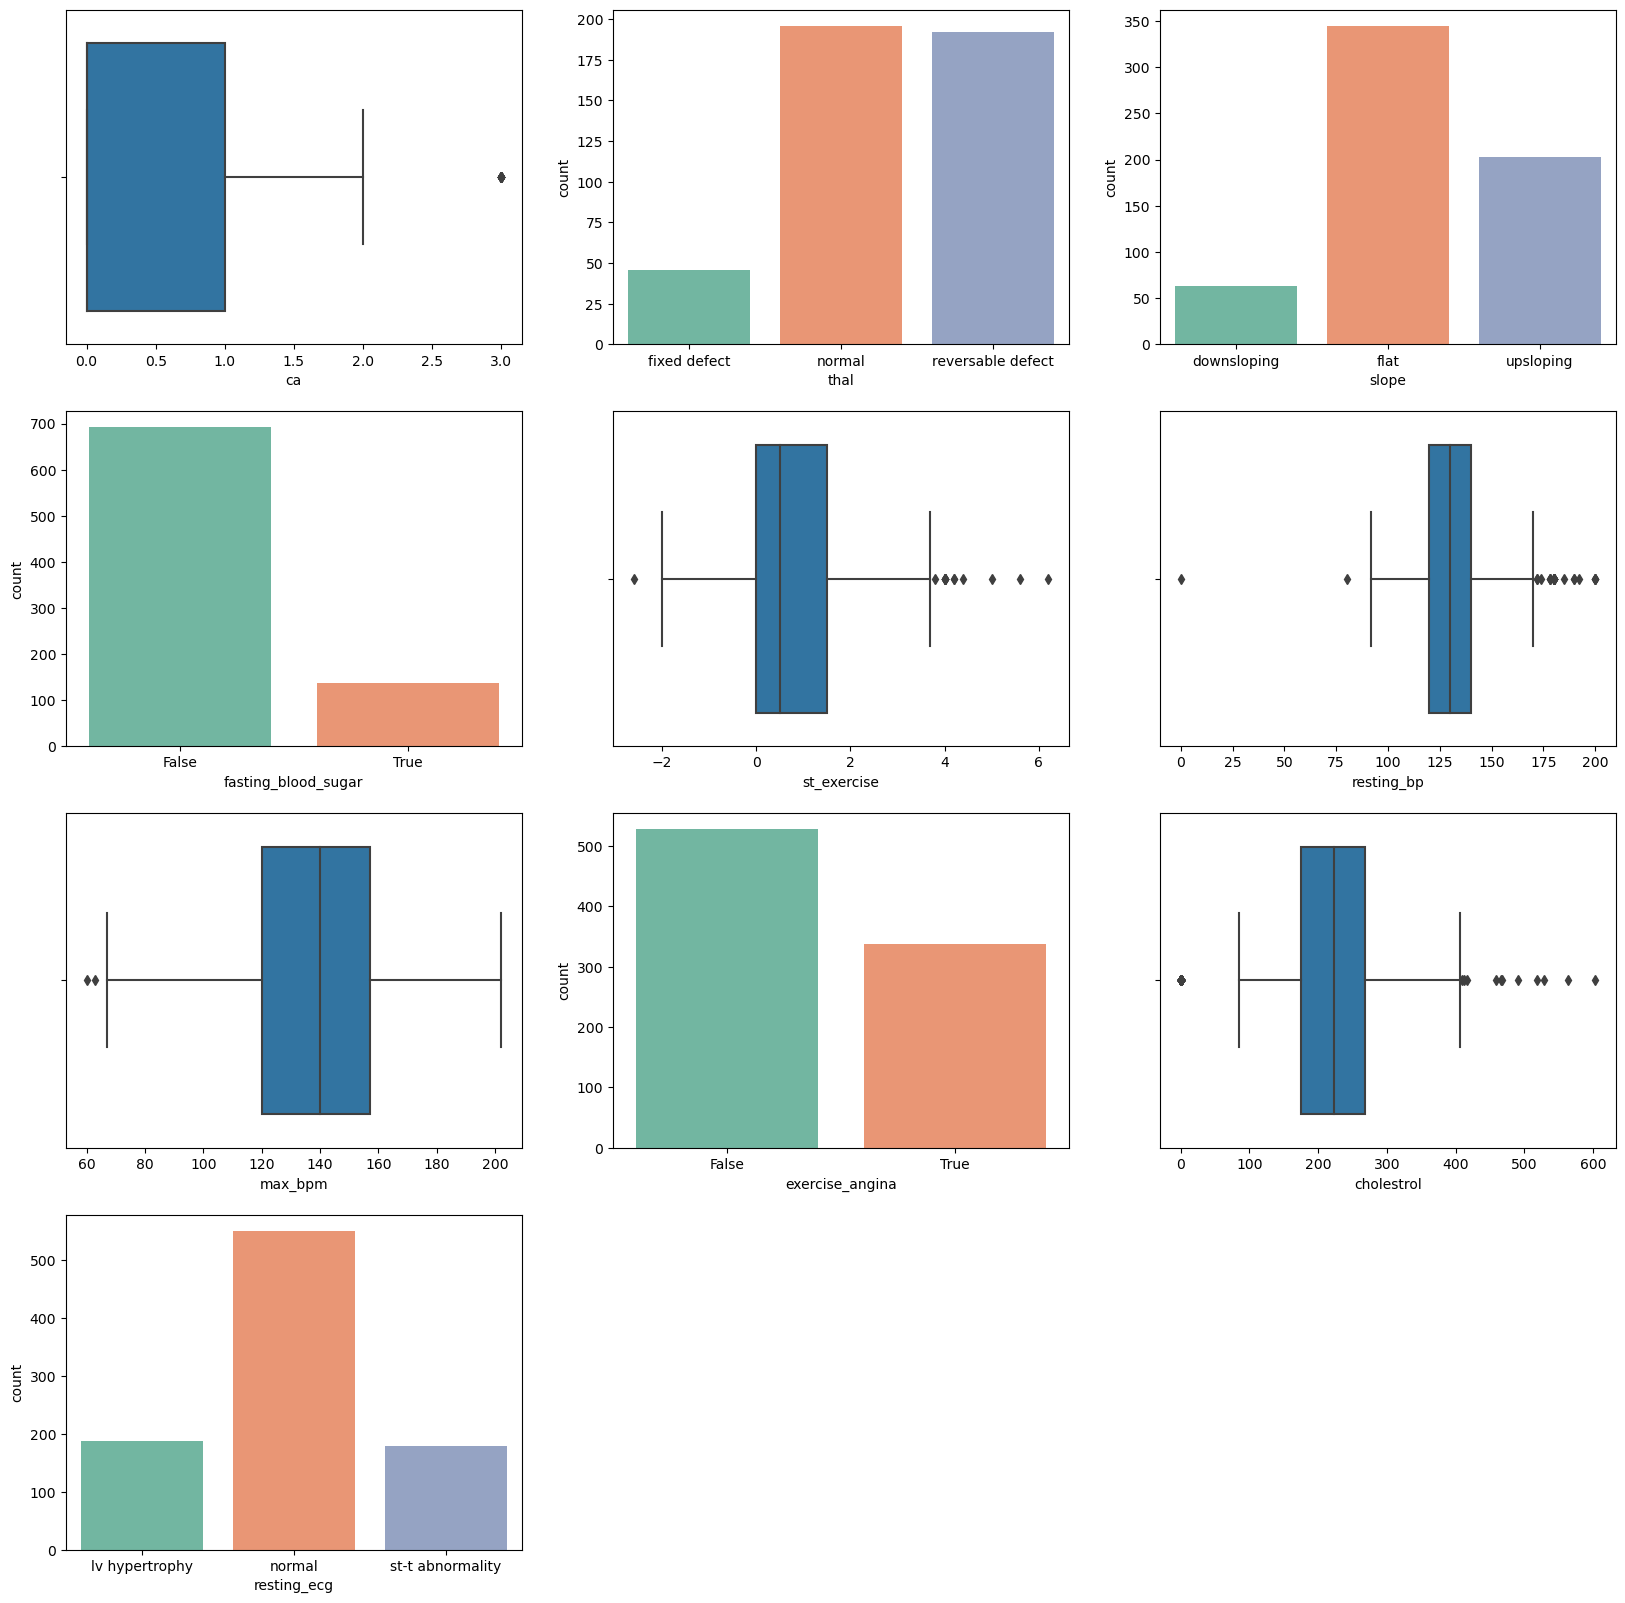

In [16]:
null_cols = null_count[null_count > 0].index

count = 0
rows = len(null_cols)//3 + len(null_cols)%3
cols = 3

plt.figure(figsize=(20, 20))
for col in null_cols:
    if df[col].dtype == object:
        count += 1
        plt.subplot(rows, cols, count)
#         sns.countplot(x=col, hue='num', data=df, palette='Set2')
        sns.countplot(x=col, data=df, palette='Set2')
    else:
        count += 1
        plt.subplot(rows, cols, count)
        sns.boxplot(x=col, data=df)

<Axes: xlabel='thal', ylabel='count'>

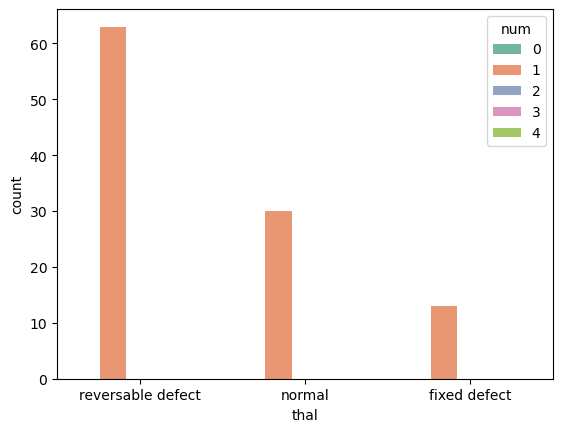

In [17]:
plt.subplot(1, 1, 1)
sns.countplot(x='thal', hue='num', data=df[(df['thal'].isnull()) | ((df['thal'].notnull()) & (df['num'] == 1))], palette='Set2')

In [18]:
# Calculate the percentage of NaN values for each column
null_percentage = round((null_count / len(df)) * 100, 2)

# Combine the counts and percentages into a new DataFrame
null_info = pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage': null_percentage
})

In [19]:
# Display the result
print(null_info[null_info['Null Count'] > 0].sort_values(by='Null Percentage', ascending=False))

                     Null Count  Null Percentage
ca                          611            66.41
thal                        486            52.83
slope                       309            33.59
fasting_blood_sugar          90             9.78
st_exercise                  62             6.74
resting_bp                   59             6.41
max_bpm                      55             5.98
exercise_angina              55             5.98
cholestrol                   30             3.26
resting_ecg                   2             0.22


## Data Cleaning

In [20]:
df1 = df.copy()

### Removing values with Null percentage > 50

In [21]:
cols_to_drop = null_info[null_info['Null Percentage'] > 50].index
df1.drop(labels=cols_to_drop, axis=1, inplace=True)

In [22]:
df1.sample(5) 

,age,sex,dataset,chest_pain,resting_bp,cholestrol,fasting_blood_sugar,resting_ecg,max_bpm,exercise_angina,st_exercise,slope,num
337,39,Male,Hungary,atypical angina,130.0,NaN,False,normal,120.0,False,0.0,NaN,0
302,38,Male,Cleveland,non-anginal,138.0,175.0,False,normal,173.0,False,0.0,upsloping,0
615,46,Male,Switzerland,asymptomatic,100.0,0.0,NaN,st-t abnormality,133.0,False,-2.6,flat,1
733,63,Male,VA Long Beach,non-anginal,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,1
548,54,Male,Hungary,asymptomatic,200.0,198.0,False,normal,142.0,True,2.0,flat,1


# Machine Learning Algorithms

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [24]:
# df1['fasting_blood_sugar'].fillna(value=False, inplace=True)
# impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent', )
# df1['fasting_blood_sugar'] = impute.fit_transform(df1[['fasting_blood_sugar']]).astype(int)

In [25]:
df1.iloc[43, :]

age                             59
sex                           Male
dataset                  Cleveland
chest_pain             non-anginal
resting_bp                   150.0
cholestrol                   212.0
fasting_blood_sugar           True
resting_ecg                 normal
max_bpm                      157.0
exercise_angina              False
st_exercise                    1.6
slope                    upsloping
num                              0
Name: 43, dtype: object

In [26]:
df1['fasting_blood_sugar'].unique()

array([True, False, nan], dtype=object)

In [27]:
numerical_cols = df1.iloc[:, :-1].select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Define transformations for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Use the ColumnTransformer in a pipeline with a classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split your data into features and target
X = df1.drop('num', axis=1)  # Features
y = df1['num']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Fit the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'resting_bp', 'cholestrol', 'max_bpm', 'st_exercise'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['sex', 'dataset', 'chest_pain', 'fasting_blood_sugar', 'resting_ecg',
       'exercise_angina', 'slope'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [28]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 59.78%
